# (Flights delays and cancellations)
## by (Omneya Essam)

## Preliminary Wrangling

> The dataset reports flights in the United States, including carriers, delays and cancellations from 2016 to 2020.The detaset includes about 70,000 observations.We will try to resolve the following questions:-

    what is the reason behind most delays ?
    what is the reason behind most cancellations?

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
%matplotlib inline

In [46]:
df = pd.read_csv("flights.csv")
df.tail(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
69280,2018,11,DL,Delta Air Lines Inc.,SYR,"Syracuse, NY: Syracuse Hancock International",131.0,21.0,7.00,1.06,5.07,0.0,7.87,0.0,0.0,1261.0,284.0,39.0,135.0,0.0,803.0,NaN
69281,2018,11,DL,Delta Air Lines Inc.,TLH,"Tallahassee, FL: Tallahassee International",141.0,26.0,7.89,0.82,5.54,0.0,11.75,0.0,2.0,977.0,193.0,42.0,153.0,0.0,589.0,NaN
69282,2018,11,DL,Delta Air Lines Inc.,TPA,"Tampa, FL: Tampa International",873.0,204.0,62.57,11.66,74.56,0.0,55.21,2.0,1.0,9053.0,3249.0,629.0,2351.0,0.0,2824.0,NaN
69283,2018,11,DL,Delta Air Lines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",31.0,3.0,2.54,0.00,0.03,0.0,0.43,0.0,1.0,206.0,190.0,0.0,3.0,0.0,13.0,NaN
69284,2018,11,DL,Delta Air Lines Inc.,TUL,"Tulsa, OK: Tulsa International",81.0,15.0,3.70,0.03,3.92,0.0,7.35,0.0,1.0,462.0,119.0,1.0,123.0,0.0,219.0,NaN


### What is the structure of your dataset?

> There are 69285 flight observations with 21 features in from 2016 till 2020.


### What is/are the main feature(s) of interest in your dataset?

> delayed and canceled flights in terms fo carriers, locations & time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> year, month, carrier, airport_name, different types of delays and cancellation reasons

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69285 entries, 0 to 69284
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 69285 non-null  int64  
 1    month               69285 non-null  int64  
 2   carrier              69285 non-null  object 
 3   carrier_name         69285 non-null  object 
 4   airport              69285 non-null  object 
 5   airport_name         69285 non-null  object 
 6   arr_flights          69221 non-null  float64
 7   arr_del15            69199 non-null  float64
 8   carrier_ct           69221 non-null  float64
 9    weather_ct          69221 non-null  float64
 10  nas_ct               69221 non-null  float64
 11  security_ct          69221 non-null  float64
 12  late_aircraft_ct     69221 non-null  float64
 13  arr_cancelled        69221 non-null  float64
 14  arr_diverted         69221 non-null  float64
 15   arr_delay           69221 non-null 

In [49]:
df.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [50]:
df.duplicated().sum()

0

In [51]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,69285.000000,69285.000000,69221.000000,69199.000000,69221.000000,69221.000000,69221.000000,69221.000000,69221.000000,69221.000000,69221.000000,69221.000000,69221.000000,69221.000000,69221.000000,69221.000000,69221.000000,0.0
mean,2017.981757,6.334445,388.435431,69.708161,19.620656,2.227556,22.301608,0.129137,25.407073,7.278499,0.925904,4555.406322,1420.261207,231.378859,1106.814579,6.428208,1790.520666,NaN
std,1.175895,3.490629,1051.793109,181.382367,45.781631,6.832007,68.487561,0.554978,70.983109,41.630620,3.861577,12948.602275,3920.287027,813.034632,4058.099108,37.388050,5154.961912,NaN
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2017.000000,3.000000,53.000000,7.000000,2.300000,0.000000,1.400000,0.000000,1.920000,0.000000,0.000000,400.000000,122.000000,0.000000,50.000000,0.000000,102.000000,NaN
50%,2018.000000,6.000000,107.000000,19.000000,6.400000,0.440000,4.500000,0.000000,6.000000,1.000000,0.000000,1150.000000,398.000000,20.000000,172.000000,0.000000,400.000000,NaN
75%,2019.000000,9.000000,266.000000,49.000000,16.340000,1.860000,13.000000,0.000000,17.030000,4.000000,1.000000,3132.000000,1127.000000,154.000000,537.000000,0.000000,1240.000000,NaN
max,2020.000000,12.000000,21977.000000,4176.000000,1242.160000,188.680000,1884.420000,19.530000,1443.450000,4951.000000,143.000000,429194.000000,196944.000000,28294.000000,112018.000000,3194.000000,147167.000000,NaN


In [52]:
df.isnull().sum()

year                       0
 month                     0
carrier                    0
carrier_name               0
airport                    0
airport_name               0
arr_flights               64
arr_del15                 86
carrier_ct                64
 weather_ct               64
nas_ct                    64
security_ct               64
late_aircraft_ct          64
arr_cancelled             64
arr_diverted              64
 arr_delay                64
 carrier_delay            64
weather_delay             64
nas_delay                 64
security_delay            64
late_aircraft_delay       64
Unnamed: 21            69285
dtype: int64

In [53]:
df = df.drop('Unnamed: 21',axis=1)

In [54]:
df = df.dropna()

In [55]:
df.isnull().sum()

year                   0
 month                 0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
 weather_ct            0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
 arr_delay             0
 carrier_delay         0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [56]:
df.shape

(69199, 21)

In [57]:
df.head(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,4.33,0.0,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,8.93,0.0,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0
2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,27.42,0.0,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0
3,2019,1,MQ,Envoy Air,SHV,"Shreveport, LA: Shreveport Regional",174.0,28.0,5.97,1.17,11.15,0.0,9.72,0.0,0.0,1655.0,360.0,55.0,268.0,0.0,972.0
4,2019,1,MQ,Envoy Air,SJT,"San Angelo, TX: San Angelo Regional/Mathis Field",135.0,23.0,10.78,0.35,6.54,0.0,5.33,2.0,0.0,835.0,320.0,27.0,192.0,0.0,296.0
5,2019,1,MQ,Envoy Air,SPI,"Springfield, IL: Abraham Lincoln Capital",53.0,5.0,2.91,0.00,1.09,0.0,1.00,2.0,0.0,169.0,100.0,0.0,28.0,0.0,41.0
6,2019,1,MQ,Envoy Air,SPS,"Wichita Falls, TX: Sheppard AFB/Wichita Falls ...",88.0,8.0,2.36,0.22,2.45,0.0,2.97,6.0,0.0,263.0,98.0,5.0,66.0,0.0,94.0
7,2019,1,MQ,Envoy Air,SRQ,"Sarasota/Bradenton, FL: Sarasota/Bradenton Int...",31.0,13.0,1.25,0.55,9.90,0.0,1.30,2.0,0.0,537.0,41.0,60.0,391.0,0.0,45.0
8,2019,1,MQ,Envoy Air,STL,"St. Louis, MO: St Louis Lambert International",59.0,15.0,3.61,2.07,5.05,0.0,4.28,7.0,0.0,683.0,205.0,78.0,218.0,0.0,182.0
9,2019,1,MQ,Envoy Air,SUX,"Sioux City, IA: Sioux Gateway Brig Gen Bud Day...",116.0,16.0,0.00,1.69,8.80,0.0,5.51,16.0,0.0,658.0,0.0,88.0,238.0,0.0,332.0


In [58]:
df['city'] = df['airport_name'].str.split(',').str[-1].str.split(':').str[0]
df['city']

0         GA
1         KY
2         MO
3         LA
4         TX
        ... 
69280     NY
69281     FL
69282     FL
69283     TN
69284     OK
Name: city, Length: 69199, dtype: object

### Number of air flights per month per airport and carier

In [59]:
print(df.carrier.unique())
print(df.carrier.nunique())

['MQ' 'NK' 'OH' 'OO' 'UA' 'WN' 'YV' 'YX' '9E' 'AA' 'AS' 'B6' 'DL' 'EV'
 'F9' 'G4' 'HA' 'VX']
18


there are 18 unique carriers

Text(0.5, 1.0, 'Number of flights per Carrier')

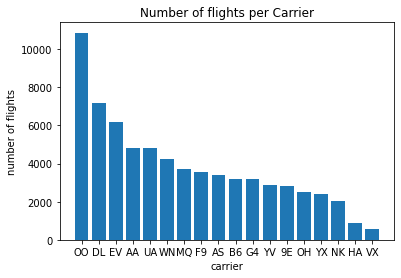

In [61]:
airlines = df.carrier.value_counts()
plt.bar(airlines.index, airlines)
plt.xlabel('carrier')
plt.ylabel('number of flights')
plt.title('Number of flights per Carrier')

-> OD has the largest number of flights and VX has the smallest one

### Number of flights in each city

Text(0.5, 1.0, 'Number of flights in each city')

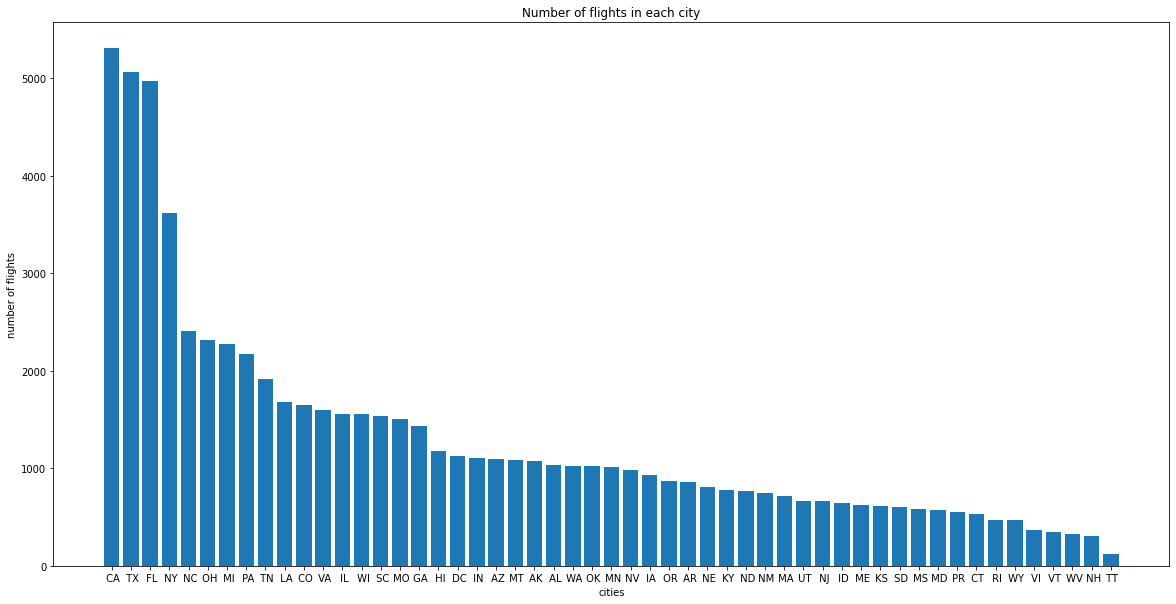

In [62]:
cities = df.city.value_counts()
plt.figure(figsize=[20,10])
plt.bar(cities.index, cities)
plt.xlabel('cities')
plt.ylabel('number of flights')
plt.title('Number of flights in each city')

-> California has the largest number of flights

### Number of flights in each month

Text(0.5, 1.0, 'Number of flights in each month')

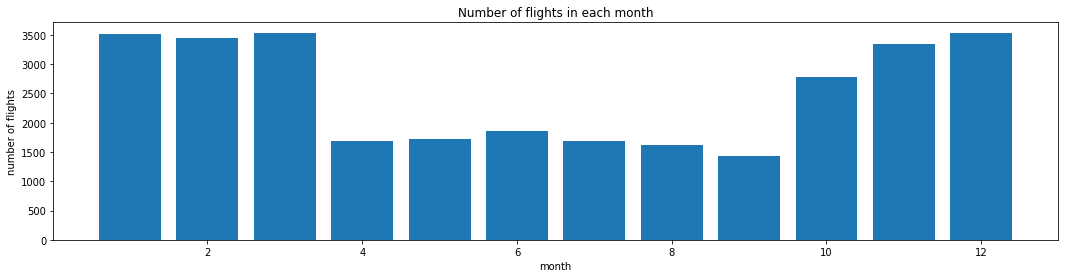

In [ ]:
months = df[' month'].value_counts()
plt.figure(figsize=[18,4])
plt.bar(months.index, months)
plt.xlabel('month')
plt.ylabel('number of flights')
plt.title('Number of flights in each month')

-> Summer months have a deacrese in number of flights

### Number of cancellations per month

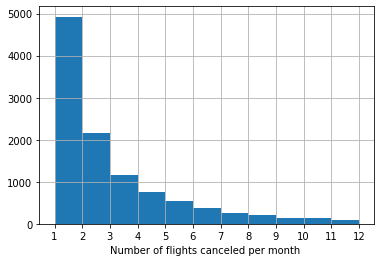

In [ ]:
df[' weather_ct'].hist(bins=list(range(1,13,1)))
plt.xlabel('Number of flights canceled per month ')
plt.xticks(ticks=list(range(1,13,1)))
plt.show()

Canceled flights are mostly in Winter as seen in the plot ( jan and feb and march )

# Bivariate Exploration


##  correlation between weather delays and weather cancelations



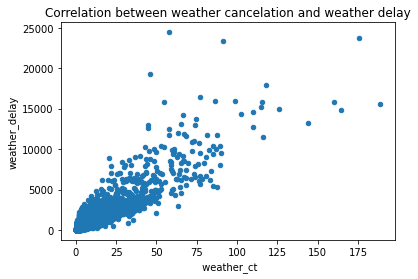

In [ ]:
df.plot.scatter(x=' weather_ct',y='weather_delay')
plt.title('Correlation between weather cancelation and weather delay')
plt.show()

-> As expected , there is  HIGH correlation between weather delay and and weather cancellation

##Relationship between month and weather delay

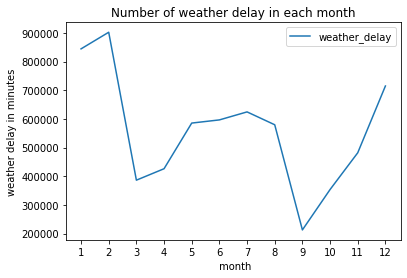

In [ ]:
df_monthly_weather = df[[' month', 'weather_delay']].groupby(' month').sum().reset_index()
df_monthly_weather.plot(x=' month', y='weather_delay' )
plt.xticks(list(range(1,13,1)))
plt.ylabel("weather delay in minutes")
plt.title("Number of weather delay in each month")
plt.show()

# Multivariate Exploration

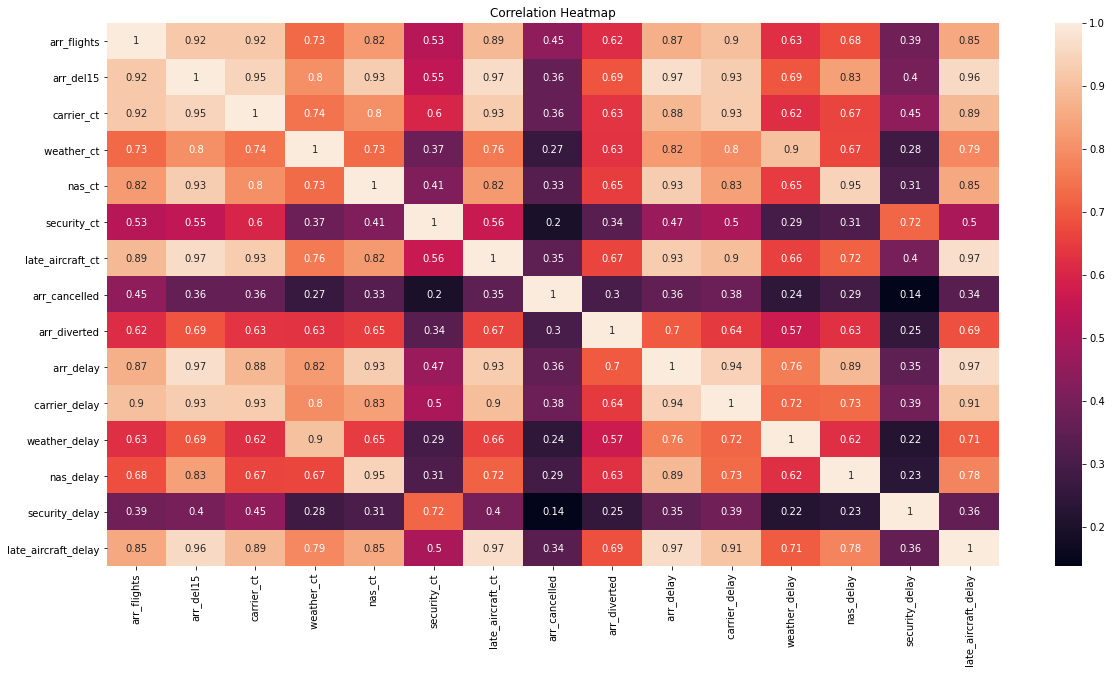

In [ ]:
df_corr = df.drop(['year',' month','carrier','carrier_name','airport','airport_name','city'],axis=1).corr()
plt.figure(figsize=(20,10))
sn.heatmap(df_corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

-> There are high correlations between cancelations and delays of the same type as proved in bivariate analysis between weather delay and weather cancellation



In [ ]:
df_delays= df.drop(['carrier','carrier_name','airport','airport_name','arr_flights',' arr_delay'],axis=1).groupby(['year',' month']).sum().reset_index()
df_delays = pd.melt(df_delays, id_vars=['year',' month'], value_vars=[' carrier_delay', 'weather_delay',"nas_delay",'security_delay','late_aircraft_delay'])
df_delays['date'] = df_delays['year'].astype(str)
df_delays = df_delays.drop(['year',' month'], axis=1)

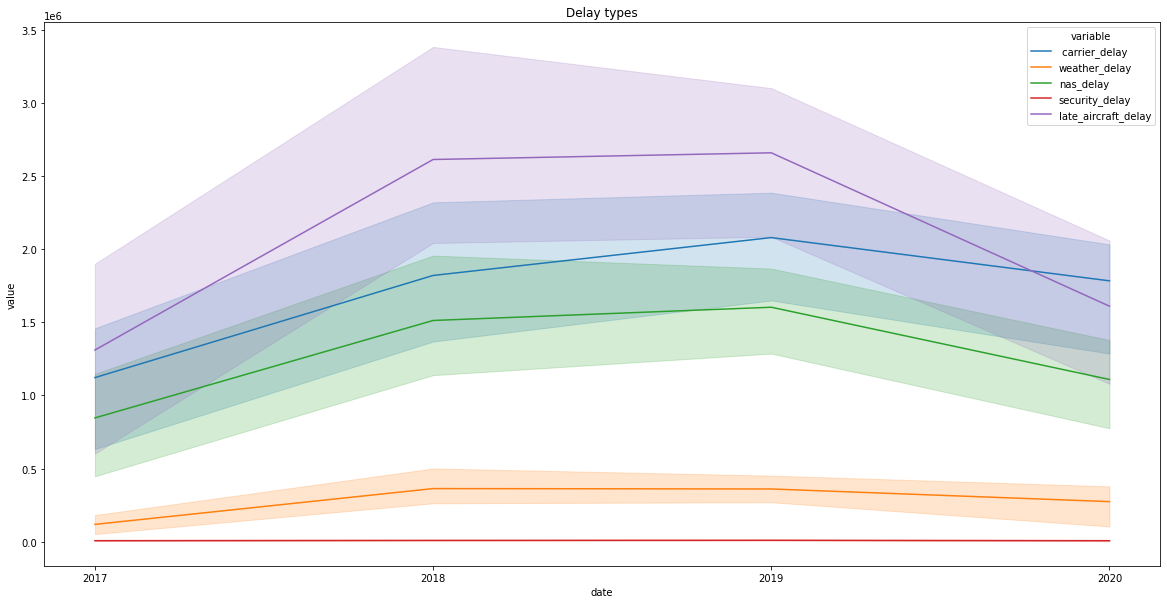

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Delay types')
plt.xticks()
sn.lineplot(x='date', y='value', hue='variable', data=df_delays)
plt.show()

-> Here we can clearly see the difference between different types of delays. We can see clearly that weather dealys never overcome the other types of delays because each is independant. We can also see that most of the time the security delay causes the least of amount of delays.

In [ ]:
cancel_df= df.drop(['carrier','carrier_name','airport','airport_name','arr_flights',' arr_delay'],axis=1).groupby(['year',' month']).sum().reset_index()
cancel_df = pd.melt(cancel_df, id_vars=['year',' month'], value_vars=['carrier_ct', ' weather_ct',"nas_ct",'security_ct','late_aircraft_ct'])
cancel_df['date'] = cancel_df['year'].astype(str)
cancel_df = cancel_df.drop(['year',' month'], axis=1)

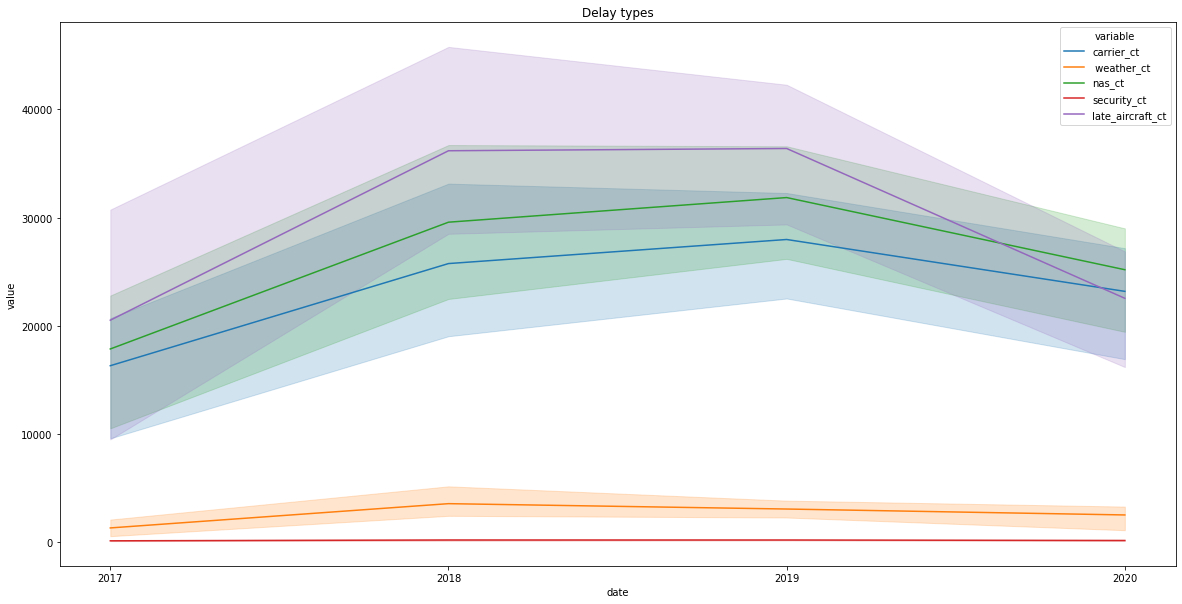

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Delay types')
plt.xticks()
sn.lineplot(x='date', y='value', hue='variable', data=cancel_df)
plt.show()

-> The cancelation plot follows the same trends as the delays plot.



In [64]:
wethear_ct_sum= df[' weather_ct'].sum()
nas_ct_sum= df['nas_ct'].sum()
carrier_ct_sum= df['carrier_ct'].sum()
secuirity_ct_sum =df['security_ct'].sum()
late_aircraft_sum = df['late_aircraft_ct'].sum()
total_cancelation = wethear_ct_sum+nas_ct_sum+carrier_ct_sum+secuirity_ct_sum+late_aircraft_sum

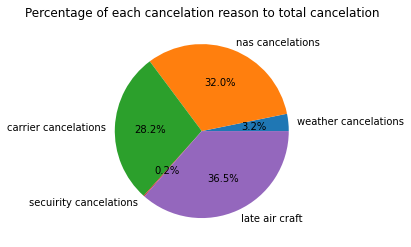

In [63]:
wethear_ct_sum=(wethear_ct_sum/total_cancelation)*100
nas_ct_sum=(nas_ct_sum/total_cancelation)*100
carrier_ct_sum=(carrier_ct_sum/total_cancelation)*100
secuirity_ct_sum=(secuirity_ct_sum/total_cancelation)*100
late_aircraft_sum=(late_aircraft_sum/total_cancelation)*100
X = ['weather cancelations','nas cancelations', 'carrier cancelations', 'secuirity cancelations','late air craft']
Y = [wethear_ct_sum,nas_ct_sum,carrier_ct_sum, secuirity_ct_sum,late_aircraft_sum]
plt.pie(Y, labels=X , autopct='%1.1f%%')
plt.title('Percentage of each cancelation reason to total cancelation')
plt.show()

-> we can see that the main reason of flights cancellation is late air craft and the least one is the weather

In [65]:
wethear_ct_sum= df['weather_delay'].sum()
nas_ct_sum= df['nas_delay'].sum()
carrier_ct_sum= df[' carrier_delay'].sum()
carrier_ct_sum =df['security_delay'].sum()
late_aircraft_sum = df['late_aircraft_delay'].sum()
total_cancelation = wethear_ct_sum+nas_ct_sum+carrier_ct_sum+secuirity_ct_sum+late_aircraft_sum

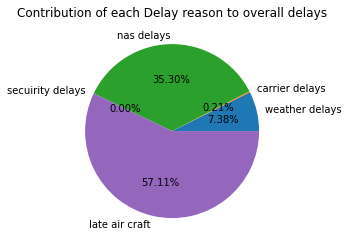

In [66]:
wethear_ct_sum=(wethear_ct_sum/total_cancelation)*100
nas_ct_sum=(nas_ct_sum/total_cancelation)*100
carrier_ct_sum=(carrier_ct_sum/total_cancelation)*100
secuirity_ct_sum=(secuirity_ct_sum/total_cancelation)*100
late_aircraft_sum=(late_aircraft_sum/total_cancelation)*100
X = ['weather delays','carrier delays' , 'nas delays', 'secuirity delays','late air craft']
Y = [wethear_ct_sum,carrier_ct_sum, nas_ct_sum, secuirity_ct_sum,late_aircraft_sum]
plt.pie(Y, labels=X , autopct='%1.2f%%')
plt.title('Contribution of each Delay reason to overall delays')
plt.show()

-> late air craft is also the main reason behind flights delay

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration.ipynb'])